# DS 3000 HW 6

Due: Tue Mar 29 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

<p style="color:blue;">Note that this HW has 78 total points to reflect the fact that its a bit shorter than others.  It will be weighed .78 as much as a 100 point HW.</p>

## Part 1 (22 points)

Match each of the covariance matrices to the dataset which is most consistent.  Note that all scatterplots below have equal scales in the x and y axes (moving an inch to the right increases x as much as moving an inch up increases y).  

Please express your response as list, ordered alphabetically by dataset.  For example, you might respond with:

- Data Set A = $\Sigma_0$
- Data Set B = $\Sigma_1$
- Data Set C = $\Sigma_2$
- Data Set D = ...

(If you'r eunsure how to format a "Sigma" in Latex, double click this markdown cell and examine the source which generated the list above)

<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$

## Part 1 Solution
- Data Set A = $ \Sigma_4 $
- Data Set B = $ \Sigma_7 $
- Data Set C = $ \Sigma_5 $
- Data Set D = $ \Sigma_8 $
- Data Set E = $ \Sigma_3 $
- Data Set F = $ \Sigma_6 $
- Data Set G = $ \Sigma_1 $
- Data Set H = $ \Sigma_0 $
- Data Set I = $ \Sigma_2 $

# Part 2: New COVID-19 cases, Scale in Covariance Matrices (16+1 points)

This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  So if `MA` is 1 on 3/16/2021, then we know that there 1 reported COVID case on 3/16/2021.

In [1]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [2]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


A younger version of yourself, before having mastered Correlation and Covariance as you now have, may have had the following reasoning:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct your past self's interpretation mistake by offering a more principled analysis of what relationships do and don't exist in the data.

To receive full credit on this question, be sure to:
- correctly identify the thinking error:
    - why is cov(MA, CA) > cov(CA, NEU)? 
        - (use might use your `.head()` to do some thinking!)
    - what should we use to measure the consistency with which values change?
- clearly explain / teach the difference so that a non-technical audience may understand
- utilize whatever features of the python libraries we've studied you see fit to explain yourself

Be clear.  Be brief.

Bonus (+1 point): Hypothesize why NU's relationship to the other states is different than between MA and CA.

## Part 2: Solution

The covariance is a scaled measurement of how two variables vary together.  Because MA and CA have much higher populations, we expect them to have larger values than NEU:

In [24]:
# solution
df_covid.describe()

,MA,CA,NEU
count,198.000000,198.000000,198.000000
mean,2370.202020,14440.131313,7.080808
std,2053.716181,14073.994270,5.536545
min,0.000000,1616.000000,0.000000
25%,581.000000,4097.250000,3.000000
50%,1842.500000,6787.500000,6.000000
75%,3652.500000,22829.750000,10.000000
max,9003.000000,53711.000000,27.000000


### Solution (cont'd)
The reason covariance is higher between MA & CA than CA & NEU is that the states have larger values.  To remove the effect of having larger values, we should measure the consistency of changes with correlation instead of covariance:

In [5]:
# solution
df_covid.corr()

,MA,CA,NEU
MA,1.000000,0.813516,0.603717
CA,0.813516,1.000000,0.523122
NEU,0.603717,0.523122,1.000000


### Solution (cont'd)

MA and CA do indeed have the strongest correlation, but NEU's new cases also fluctuate with state level data.

**BONUS**:
The differenced between NEU and state level data may be drive by:

* The demographics / socioeconomic status of NU students varies differs from either MA and CA more than these statistics vary between MA and CA.  Many of these factors are themselves correlated with differences in COVID transmission.
* Northeastern has a very different testing strategy than either of the states.


# Part 3: Beans!

In this problem we'll use the k-Nearest Neighbor classifier to classify the species of plant that a bean comes from [a very large collection of bean image data](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset).

Note:
- each subpart requires the completion of all previous sub-parts
- the earlier subparts make scale normalization / cross validation errors on purpose
    - these will be addressed in later parts
- you may find it helpful to load a fresh copy of `df_bean` in parts 3.1, 3.3 and 3.4

In [6]:
import pandas as pd

df_bean = pd.read_csv('dry_bean.csv')

df_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Part 3.1 (10 points)
Build a 21-Nearest Neighbor classifier which is `fit` and `predict`s on the whole dataset.

In [7]:
# part 3.1 solution
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

k = 21

df_bean = pd.read_csv('dry_bean.csv')

# all but final feature
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

# extract data into numpy format (for sklearn)
x = df_bean.loc[:, x_feat_list].values
y_true = df_bean.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# train on training data
knn_classifier.fit(x, y_true)

# estimate each bean's species
y_pred = knn_classifier.predict(x)

## Part 3.2 (10 points)
Plot the confusion matrix which results from this dataset.  

Using the confusion matrix, identify the bean mostly commonly misclassified by
- explicitly computing its accuracy
- telling which other bean it is most commonly mistaken for

Your response should be one or two sentences.

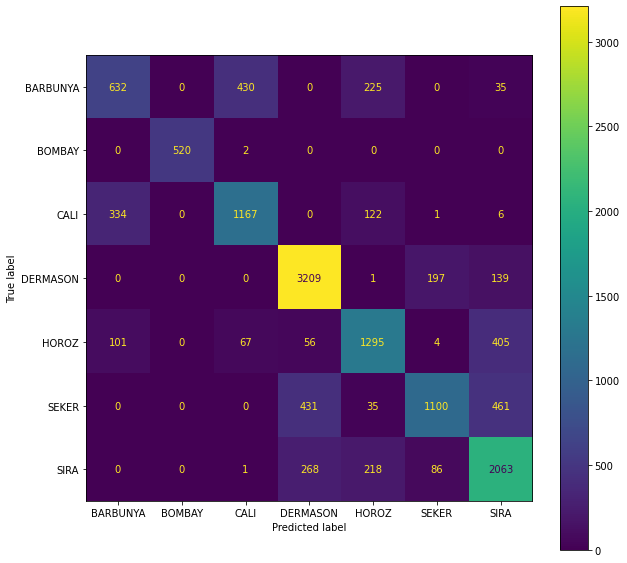

In [8]:
# solution
# build confusion matrix and plot it
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)

In [9]:
# solution
acc_barbunya = 632 / (632 + 430 + 225 + 35)
acc_barbunya

0.47806354009077157

### Part 3.2 Solution

The Barbunya bean is most commonly mistaken, it is only 632 / (632 + 430 + 225 + 35) = .478 accurate.  It is most commonly mistaken for the Cali bean.

## Part 3.3 (10 points)
In a few sentences, describe how the scale of the data may be causing issues in the classifier's performance.  (Hint: see class notes on scale normalization).  Explicitly compute the variance of the raw `df_bean` dataset and refer to it in your explanation.

Repeat (i.e. copy/paste) parts 3.1 and 3.2, but add in a fix for this scaling problem.

In [10]:
# solution
df_bean = pd.read_csv('dry_bean.csv')
df_bean.var()

Area               8.599026e+08
Perimeter          4.592007e+04
MajorAxisLength    7.343494e+03
MinorAxisLength    2.022309e+03
AspectRation       6.085026e-02
Eccentricity       8.464324e-03
ConvexArea         8.865456e+08
EquivDiameter      3.501932e+03
Extent             2.409471e-03
Solidity           2.171913e-05
roundness          3.542617e-03
Compactness        3.808552e-03
ShapeFactor1       1.272380e-06
ShapeFactor2       3.550668e-07
ShapeFactor3       9.800238e-03
ShapeFactor4       1.906595e-05
dtype: float64

### Part 3.3 Solution
The distance used weighs features according to their variance.  As seen above, the `Area` and `ConvexArea` features have much larger variances than other features.  As a result, the distances between beans effectively ignores all other features but these two, depriving the classifier of this information.

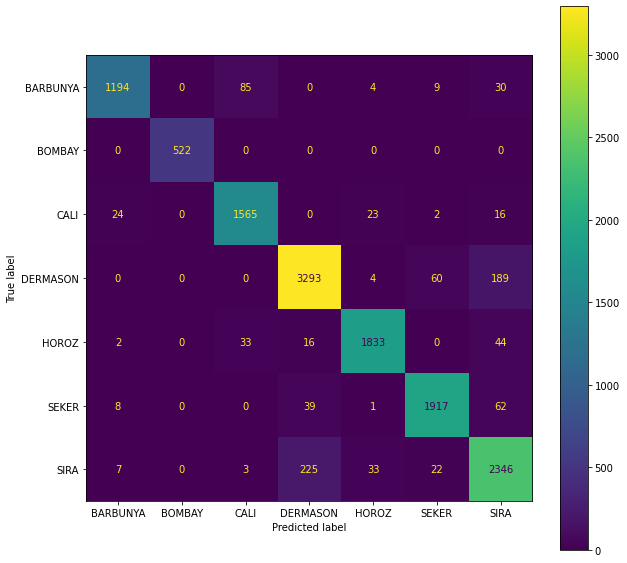

In [11]:
# part 3.3 solution (now with scale normalization!)
k = 21

df_bean = pd.read_csv('dry_bean.csv')

# all but final feature
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

# scale normalization
for feat in x_feat_list:
    df_bean[feat] = df_bean[feat] / df_bean[feat].std()

# extract data into numpy format (for sklearn)
x = df_bean.loc[:, x_feat_list].values
y_true = df_bean.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# train on training data
knn_classifier.fit(x, y_true)

# estimate each bean's species
y_pred = knn_classifier.predict(x)

# build confusion matrix and plot it
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)

## Part 3.4 (10 points)
In a few sentences, describe how the confusion matrix shown in part 3.3 may overstate how accurate the classifier would be in predicting the species of some new bean.  (Hint: see class notes on cross validation).  Update the code of part 3.3 to resolve this issue.

## Part 3.4 Solution
Remember that we seek to build a classifier which is able to predict the species of some new bean, which the classifier has not been trained on.  The confusion matrix above shows the performance of the classifier on beans which it has already seen as training data.  (And at least one of those neighbors is the exact bean voting for its own ground truth species!  This can hardly be reproduced for some new bean whose species is unknown!)

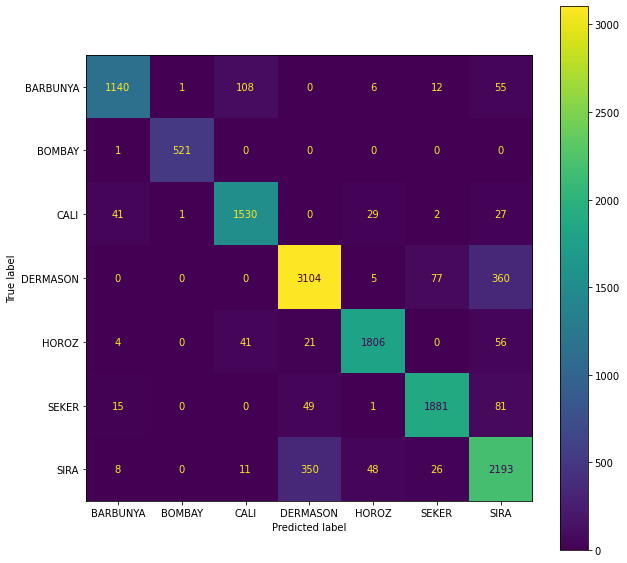

In [12]:
# part 3.4 solution (now with scale normalization & cross validation!)
k = 21
n_splits = 10

df_bean = pd.read_csv('dry_bean.csv')

# all but final feature
x_feat_list = df_bean.columns[:-1]
y_feat = 'Class'

# scale normalization
for feat in x_feat_list:
    df_bean[feat] = df_bean[feat] / df_bean[feat].std()

# extract data into numpy format (for sklearn)
x = df_bean.loc[:, x_feat_list].values
y_true = df_bean.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# initialize an empty array same size as y_true
y_pred = np.empty_like(y_true)

k_fold = StratifiedKFold(n_splits=n_splits)
for train_idx, test_idx in k_fold.split(x, y_true):
    # get training data
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]

    # get testing data
    x_test = x[test_idx, :]
    y_true_test = y_true[test_idx]

    # train on training data
    knn_classifier.fit(x_train, y_true_train)

    # estimate each bean's species
    y_pred[test_idx] = knn_classifier.predict(x_test)

# build confusion matrix and plot it
conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()
plt.gcf().set_size_inches(10, 10)
plt.grid(False)